<a href="https://www.kaggle.com/code/abhijitdarekar001/wine-quality-prediction?scriptVersionId=99441659" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequality/winequality-red.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
#Reading the dataset
wine=pd.read_csv('../input/winequality/winequality-red.csv')

In [4]:
#Printing the top rows of dataset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#describing the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Printing the info of dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Understanding the dataset with seaborn 
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

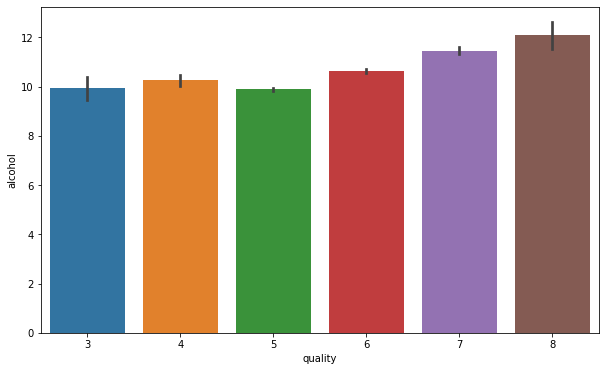

In [8]:
#Comparing amount of alcohol with the wine quaility
fig = plt.figure(figsize = (10,6))
sns.barplot(x='quality',y='alcohol',data=wine)

#As quality increases alcohol level decreases

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

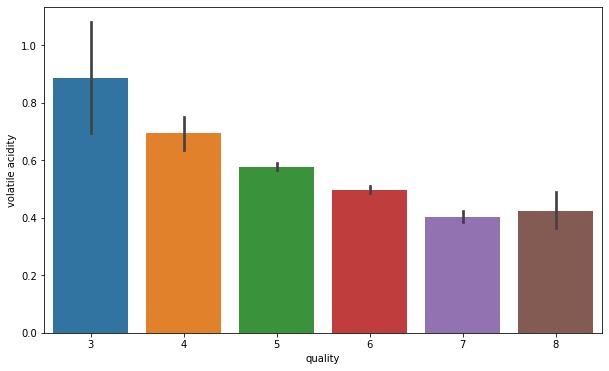

In [9]:
#Coampring quaility with the acidity 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

#We see that as quaility increases acidity decreases

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

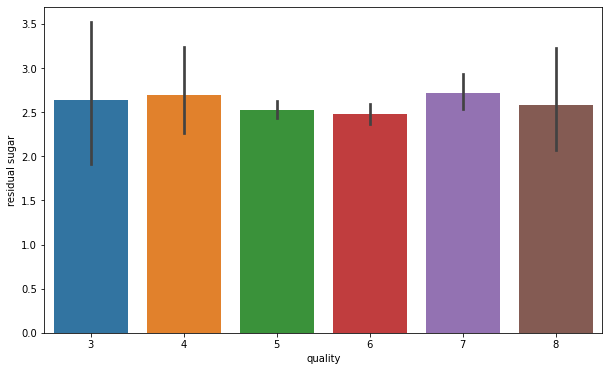

In [10]:
#Comparing reseduial sugar with quaility 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [11]:
#lets find out the different quality levels in wine to group the quality
wine['quality'].unique()
#As we find there are 6 unique values in the quality level, so this means we can add the bins level in the dataset.

array([5, 6, 7, 4, 8, 3])

In [12]:
#Dividing the wine quality as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
#Wine quality is set to bad if the quality is less then 6.5 and set to go if grater then 6.5  
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [13]:
print(wine.head())
# As last column had now data good and bad.
print(wine['quality'].value_counts())#I

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3 

In [14]:
#initilize label encoder to encode the quality feature in the dataset
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [15]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

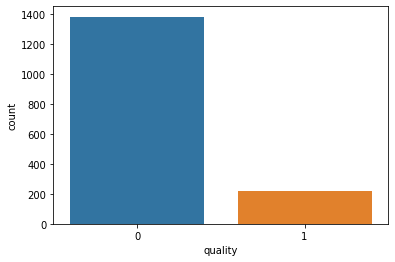

In [16]:
#Printing the count of quality in countolot
sns.countplot(wine['quality'])

Splitting the dataset into training and tesing 

In [17]:
#Sepreating the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Implementing the code using the RandomForestClassifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
y_pred= forest.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.75      0.51      0.61        47

    accuracy                           0.90       320
   macro avg       0.84      0.74      0.78       320
weighted avg       0.90      0.90      0.90       320



[[265   8]
 [ 23  24]]


**With n_estimators as 100 we got accurucy upto 91% **

# implementing with SVC()

In [22]:
from sklearn.svm import SVC
svc=SVC()

In [23]:
svc.fit(X_train,y_train)
svc_y_pred=svc.predict(X_test)

In [24]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320



In [25]:
print(confusion_matrix(y_test,svc_y_pred))

[[273   0]
 [ 46   1]]


**Accurucy of the SVC is 86%**

# Trying to tune the model by using GridSeachCV wiht SVM

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'C': [0.8,1,1.2,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,1.2,1.4]
}

In [28]:
grid_svc = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5,refit=True,verbose=3)

In [29]:
grid_svc.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ...C=0.8, gamma=0.1, kernel=linear;, score=0.867 total time=   4.0s
[CV 2/5] END ...C=0.8, gamma=0.1, kernel=linear;, score=0.867 total time=   6.8s
[CV 3/5] END ...C=0.8, gamma=0.1, kernel=linear;, score=0.867 total time=   1.5s
[CV 4/5] END ...C=0.8, gamma=0.1, kernel=linear;, score=0.867 total time=   5.2s
[CV 5/5] END ...C=0.8, gamma=0.1, kernel=linear;, score=0.867 total time=   9.8s
[CV 1/5] END ......C=0.8, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 2/5] END ......C=0.8, gamma=0.1, kernel=rbf;, score=0.883 total time=   0.1s
[CV 3/5] END ......C=0.8, gamma=0.1, kernel=rbf;, score=0.871 total time=   0.1s
[CV 4/5] END ......C=0.8, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.1s
[CV 5/5] END ......C=0.8, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.1s
[CV 1/5] END ...C=0.8, gamma=1.2, kernel=linear;, score=0.867 total time=   4.1s
[CV 2/5] END ...C=0.8, gamma=1.2, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.8, 1, 1.2, 1.4], 'gamma': [0.1, 1.2, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=3)

In [30]:
grid_svc.best_params_

{'C': 1, 'gamma': 1.2, 'kernel': 'rbf'}

In [31]:
svc2 = SVC(C=1,gamma=1.2,kernel='rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       273
           1       1.00      0.26      0.41        47

    accuracy                           0.89       320
   macro avg       0.94      0.63      0.67       320
weighted avg       0.90      0.89      0.86       320



SVC gives an accurucy of total 89% which is more then the normal svc parameters